In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:


# Define the correct file path
file_path = r"C:\Users\asraf\Downloads\Project MAA\Data set 2022-2023.xlsx"

# Load the dataset from Excel
df = pd.read_excel(file_path)

# Display the first few rows
print("Dataset Loaded Successfully:")
print(df.head())  # This will print the first five rows
#Adjust crime rate and SCALE it
df["Crime Rate Log"] = np.log1p(df["Crime Rate/1000 resident "] / 1000)  # log(1 + x)
scaler = MinMaxScaler()
df["Crime Rate Scaled"] = scaler.fit_transform(df[["Crime Rate Log"]])

#delete old columns
df.drop(columns=["Crime Rate/1000 resident ", "Crime Rate Log"], inplace=True)

df.head()
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Loaded Successfully:
   PricePerSq  Zip code  Year  Month  Year Built  Age Sold Last sold price  \
0         224     32207  2022      1        1941        81          295000   
1         265     32207  2022      1        1948        74          429000   
2         152     32207  2022      1        1956        66          190000   
3         299     32207  2022      1        1953        69          575000   
4         220     32207  2022      2        1947        75          230000   

   Size(sqft)  Lot size(sqrt)  Floors  ...  Majority race  Majority Gender  \
0        1317          7353.0       1  ...              3                1   
1        1618          8575.0       1  ...              3                1   
2        1252         19528.0       1  ...              3                1   
3        1926         13533.0       1  ...              3                1   
4        1047          6544.0       1  ...              3                1   

   Med Income  % CollegeUp  Med A

In [6]:
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['PricePerSq', 'Zip code', 'Year', 'Month', 'Year Built', 'Age Sold', 'Last sold price', 'Size(sqft)', 'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Pool', 'Garage', 'HOA', 'Prop tax', 'Elementary', 'Middle School', 'Highschool', 'Quiet', 'Majority race', 'Majority Gender', 'Med Income', '% CollegeUp', 'Med Age', 'Commute Time', 'Year to election', 'Party in House', 'Party In Senate', 'Crime Rate Scaled']


In [7]:
from sklearn.preprocessing import StandardScaler

# Corrected numerical column names
num_cols = [
    'Size(sqft)', 'Lot size(sqrt)', 'Floors', 'Bed Rooms', 'Bath', 'Garage', 'HOA',
    'Prop tax', 'Crime Rate Scaled', 'Med Income', '% CollegeUp',
    'Med Age', 'Commute Time', 'Year to election'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows after scaling
print("Feature Scaling Applied:")
print(df.head())  # Print first few rows to confirm

Feature Scaling Applied:
   PricePerSq  Zip code  Year  Month  Year Built  Age Sold Last sold price  \
0         224     32207  2022      1        1941        81          295000   
1         265     32207  2022      1        1948        74          429000   
2         152     32207  2022      1        1956        66          190000   
3         299     32207  2022      1        1953        69          575000   
4         220     32207  2022      2        1947        75          230000   

   Size(sqft)  Lot size(sqrt)    Floors  ...  Majority race  Majority Gender  \
0   -0.572002       -0.356073 -0.375079  ...              3                1   
1   -0.181006       -0.231554 -0.375079  ...              3                1   
2   -0.656437        0.884526 -0.375079  ...              3                1   
3    0.219084        0.273652 -0.375079  ...              3                1   
4   -0.922730       -0.438507 -0.375079  ...              3                1   

   Med Income  % CollegeU

In [8]:
# Check column data types
print("Column Data Types:")
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-Numeric Columns:", non_numeric_cols)

Column Data Types:
PricePerSq             int64
Zip code               int64
Year                   int64
Month                  int64
Year Built             int64
Age Sold               int64
Last sold price       object
Size(sqft)           float64
Lot size(sqrt)       float64
Floors               float64
Bed Rooms            float64
Bath                 float64
Pool                   int64
Garage               float64
HOA                  float64
Prop tax             float64
Elementary           float64
Middle School          int64
Highschool           float64
Quiet                  int64
Majority race          int64
Majority Gender        int64
Med Income           float64
% CollegeUp          float64
Med Age              float64
Commute Time         float64
Year to election     float64
Party in House         int64
Party In Senate        int64
Crime Rate Scaled    float64
dtype: object

Non-Numeric Columns: ['Last sold price']


In [9]:
# Properly remove $ and , symbols and convert to numeric
df['Last sold price'] = df['Last sold price'].replace({r'\$': '', r',': '', r'\xa0': ''}, regex=True)
df['Last sold price'] = pd.to_numeric(df['Last sold price'], errors='coerce')  # Convert to float

# Verify that the column is now numeric
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
PricePerSq             int64
Zip code               int64
Year                   int64
Month                  int64
Year Built             int64
Age Sold               int64
Last sold price        int64
Size(sqft)           float64
Lot size(sqrt)       float64
Floors               float64
Bed Rooms            float64
Bath                 float64
Pool                   int64
Garage               float64
HOA                  float64
Prop tax             float64
Elementary           float64
Middle School          int64
Highschool           float64
Quiet                  int64
Majority race          int64
Majority Gender        int64
Med Income           float64
% CollegeUp          float64
Med Age              float64
Commute Time         float64
Year to election     float64
Party in House         int64
Party In Senate        int64
Crime Rate Scaled    float64
dtype: object


Highly Correlated Feature Pairs (Threshold > 0.8):
('Year', 'Year to election')
('Year', 'Party in House')
('Year', 'Party In Senate')
('Year Built', 'Age Sold')
('Last sold price', 'Size(sqft)')
('Last sold price', 'Prop tax')
('Majority race', 'Med Income')
('Majority race', 'Crime Rate Scaled')
('Med Income', 'Crime Rate Scaled')
('% CollegeUp', 'Party In Senate')
('Year to election', 'Party in House')
('Year to election', 'Party In Senate')
('Party in House', 'Party In Senate')


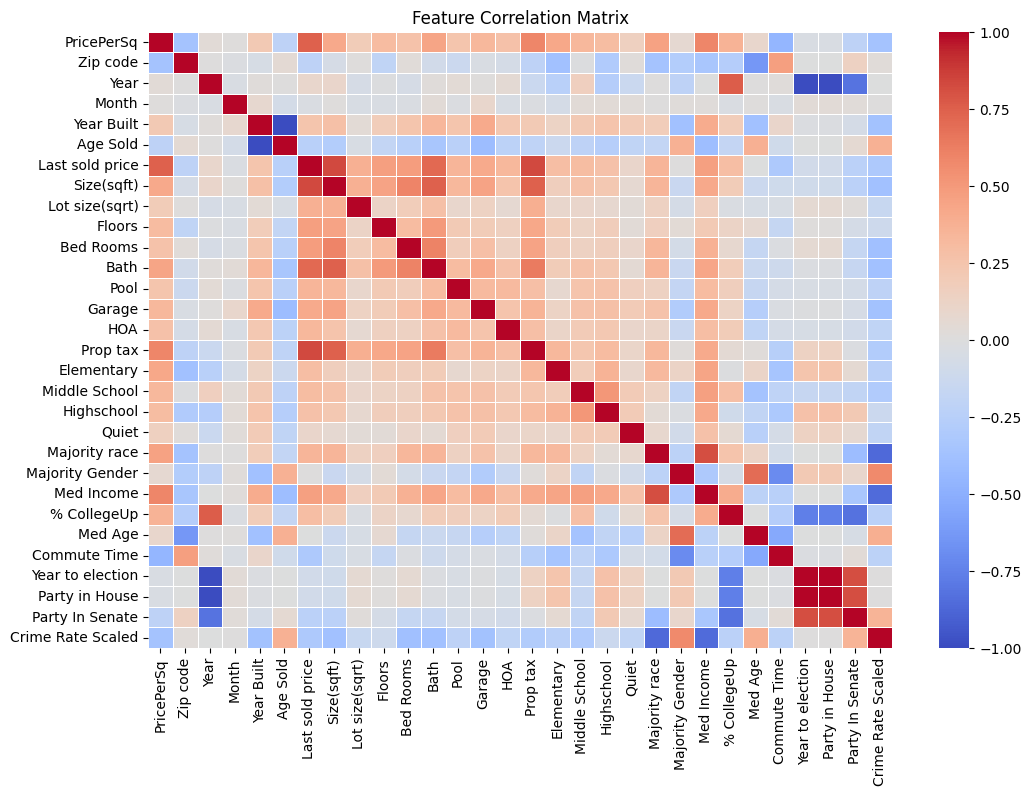

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated features (absolute correlation > threshold)
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Print highly correlated feature pairs
print("Highly Correlated Feature Pairs (Threshold > 0.8):")
for pair in high_corr_pairs:
    print(pair)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

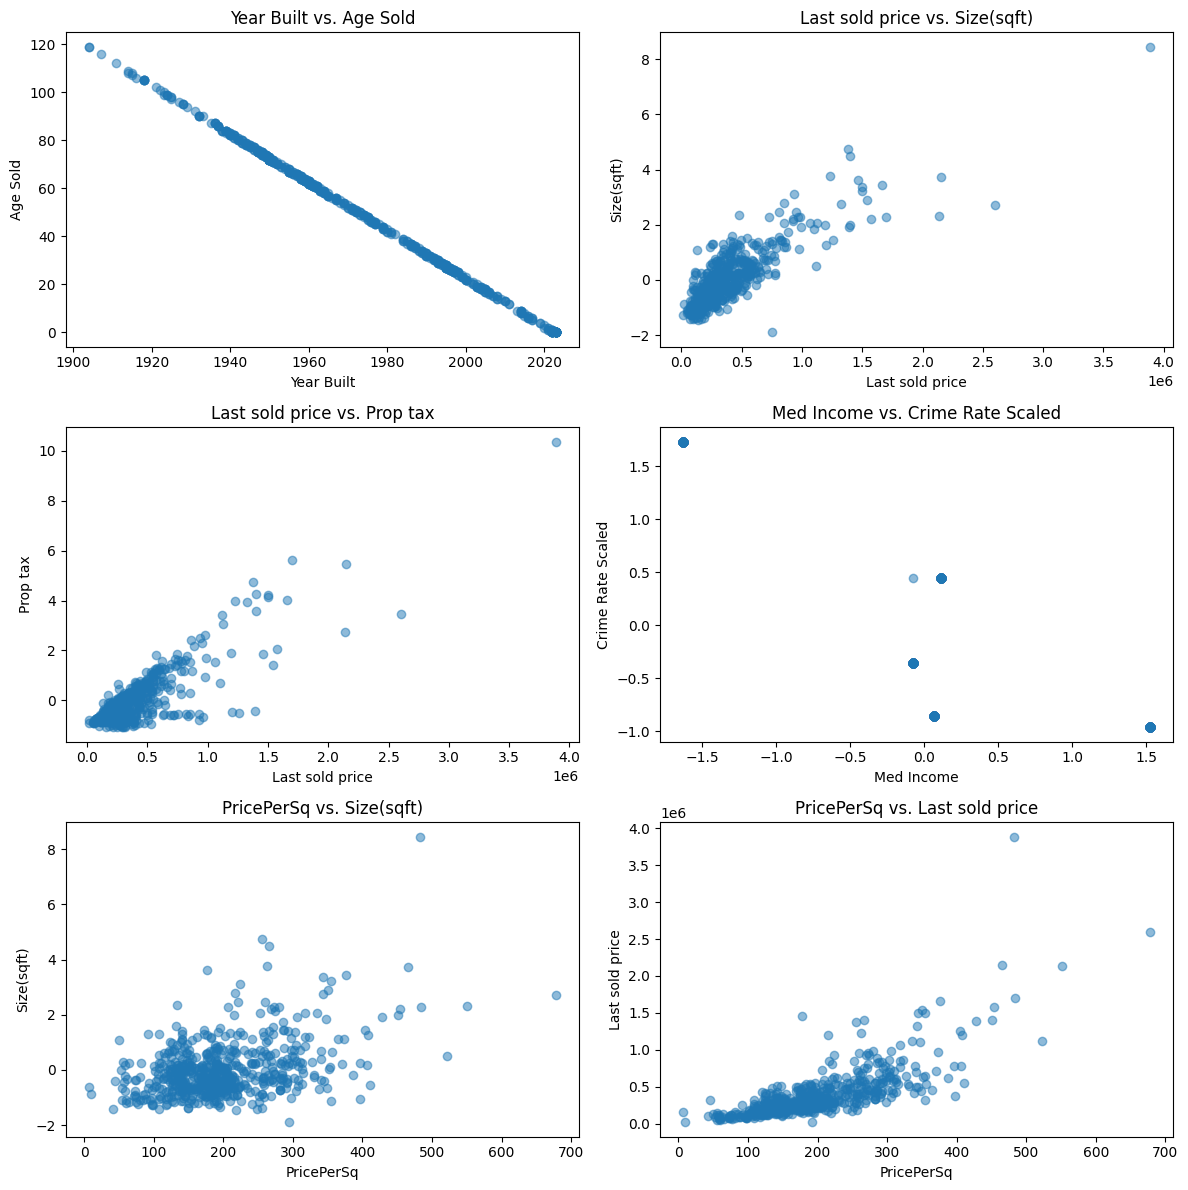

In [11]:
import matplotlib.pyplot as plt

# Define feature pairs for scatter plots
scatter_pairs = [
    ('Year Built', 'Age Sold'),
    ('Last sold price', 'Size(sqft)'),
    ('Last sold price', 'Prop tax'),
    ('Med Income', 'Crime Rate Scaled'),
    ('PricePerSq', 'Size(sqft)'),  # Added target variable for extra insight
    ('PricePerSq', 'Last sold price')
]

# Generate scatter plots
plt.figure(figsize=(12, 12))

for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y}")

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Define the target variable (PricePerSq)
target = 'PricePerSq'

# Define feature set (excluding target variable)
X = df.drop(columns=[target])
y = df[target]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 480 samples
Testing set: 120 samples


In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, ElasticNet
import numpy as np

# Define 10-Fold Cross-Validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize Ridge and Elastic Net models
ridge = Ridge()
elastic_net = ElasticNet()

# Evaluate Ridge using 10-Fold CV (Outer Loop)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores.mean())

# Evaluate Elastic Net using 10-Fold CV (Outer Loop)
elastic_scores = cross_val_score(elastic_net, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
elastic_rmse = np.sqrt(-elastic_scores.mean())

# Display results
print(f"Initial Ridge Regression RMSE (Outer CV): {ridge_rmse:.4f}")
print(f"Initial Elastic Net RMSE (Outer CV): {elastic_rmse:.4f}")

Initial Ridge Regression RMSE (Outer CV): 41.6619
Initial Elastic Net RMSE (Outer CV): 44.4630


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Ridge, ElasticNet

# Define parameter grid for Ridge
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Define parameter grid for Elastic Net with extended alpha range
elastic_param_grid = {
    'alpha': [0.1, 1, 10, 100, 500, 1000],  # Increased alpha range for stability
    'l1_ratio': [0.1, 0.5, 0.9]
}

# 5-Fold CV for Inner Loop
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Feature selection: Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

# Perform Grid Search for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=inner_cv, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Perform Grid Search for Elastic Net with increased max_iter and tol
elastic_grid = GridSearchCV(
    ElasticNet(max_iter=10000, tol=0.001),  # Increased tolerance for better convergence
    elastic_param_grid,
    cv=inner_cv,
    scoring='neg_mean_squared_error'
)

elastic_grid.fit(X_train_selected, y_train)

# Best hyperparameters and corresponding scores
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_rmse = np.sqrt(-ridge_grid.best_score_)

best_elastic_alpha = elastic_grid.best_params_['alpha']
best_elastic_l1_ratio = elastic_grid.best_params_['l1_ratio']
best_elastic_rmse = np.sqrt(-elastic_grid.best_score_)

# Display results
print(f"Best Ridge Alpha: {best_ridge_alpha}, RMSE: {best_ridge_rmse:.4f}")
print(f"Final Best Elastic Net Alpha: {best_elastic_alpha}, L1 Ratio: {best_elastic_l1_ratio}, RMSE: {best_elastic_rmse:.4f}")

C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.518e+05, tolerance: 2.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.226e+05, tolerance: 2.538e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\asraf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best Ridge Alpha: 10, RMSE: 42.3619
Final Best Elastic Net Alpha: 0.1, L1 Ratio: 0.5, RMSE: 42.3507


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Ridge Model using best alpha
ridge_final = Ridge(alpha=best_ridge_alpha)
ridge_final.fit(X_train, y_train)

# Train Elastic Net Model using best alpha and l1_ratio
elastic_final = ElasticNet(alpha=best_elastic_alpha, l1_ratio=best_elastic_l1_ratio, max_iter=10000, tol=0.001)
elastic_final.fit(X_train, y_train)

# Predict on Test Data
ridge_pred = ridge_final.predict(X_test)
elastic_pred = elastic_final.predict(X_test)

# Evaluate Performance for Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

# Calculate Adjusted R² for Ridge
n = len(y_test)  # Number of test samples
p = X_train.shape[1]  # Number of predictors
ridge_adj_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)

# Evaluate Performance for Elastic Net
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, elastic_pred)

# Calculate Adjusted R² for Elastic Net
elastic_adj_r2 = 1 - (1 - elastic_r2) * (n - 1) / (n - p - 1)

# Display Results
print(f"Final Ridge Regression Performance on Test Data:")
print(f" - MSE: {ridge_mse:.4f}")
print(f" - RMSE: {ridge_rmse:.4f}")
print(f" - R² Score: {ridge_r2:.4f}")
print(f" - Adjusted R²: {ridge_adj_r2:.4f}")

print("\nFinal Elastic Net Performance on Test Data:")
print(f" - MSE: {elastic_mse:.4f}")
print(f" - RMSE: {elastic_rmse:.4f}")
print(f" - R² Score: {elastic_r2:.4f}")
print(f" - Adjusted R²: {elastic_adj_r2:.4f}")

Final Ridge Regression Performance on Test Data:
 - MSE: 1068.5297
 - RMSE: 32.6884
 - R² Score: 0.7794
 - Adjusted R²: 0.7083

Final Elastic Net Performance on Test Data:
 - MSE: 1055.6907
 - RMSE: 32.4914
 - R² Score: 0.7820
 - Adjusted R²: 0.7118


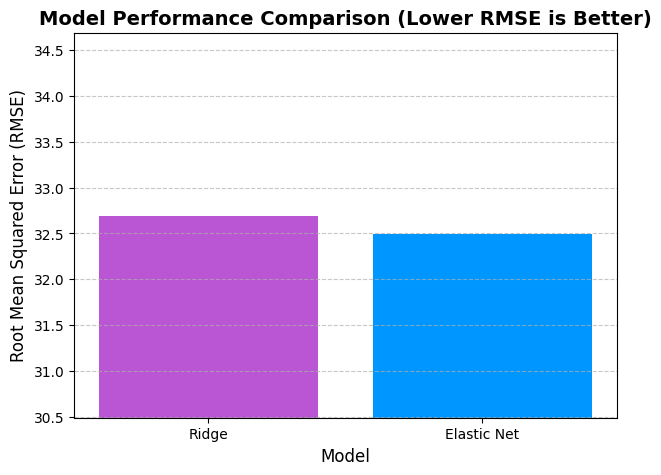

In [50]:
import matplotlib.pyplot as plt

# Define new colors
colors = ["#BA55D3", "#0096FF"]  # Warm Purple for Ridge, Electric Blue for Elastic Net

# Bar chart comparing RMSE of Ridge vs. Elastic Net
plt.figure(figsize=(7,5))
plt.bar(["Ridge", "Elastic Net"], [ridge_rmse, elastic_rmse], color=colors)

# Labels and formatting
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Model Performance Comparison (Lower RMSE is Better)", fontsize=14, fontweight='bold')

# Adjust y-axis limits for better visualization
plt.ylim(min(ridge_rmse, elastic_rmse) - 2, max(ridge_rmse, elastic_rmse) + 2)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

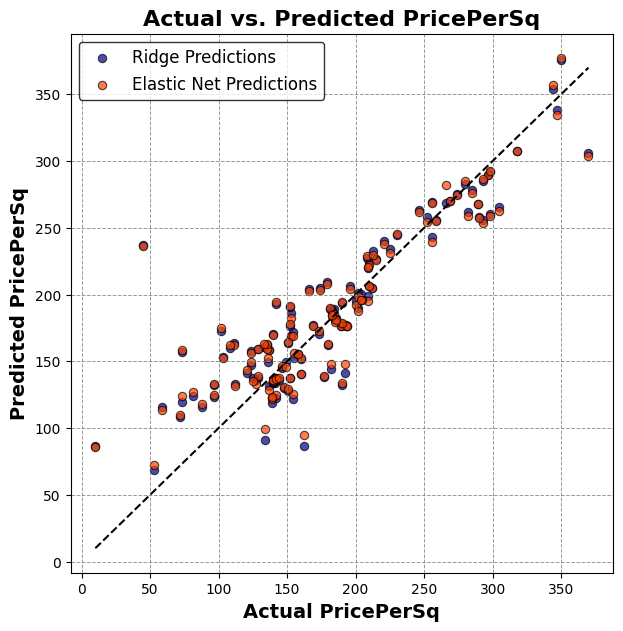

In [51]:
import matplotlib.pyplot as plt

# Define Dark Blue and Bright Orange colors
ridge_color = (0/255, 0/255, 139/255)  # Dark Blue (Normalized RGB)
elastic_color = (255/255, 69/255, 0/255)  # Bright Orange (Normalized RGB)

plt.figure(figsize=(7,7))

# Ridge predictions (Dark Blue)
plt.scatter(y_test, ridge_pred, alpha=0.7, label="Ridge Predictions", color=ridge_color, edgecolors='k', linewidth=0.8)

# Elastic Net predictions (Bright Orange)
plt.scatter(y_test, elastic_pred, alpha=0.7, label="Elastic Net Predictions", color=elastic_color, edgecolors='k', linewidth=0.8)

# Perfect prediction line (diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1.5)

# Labels and formatting
plt.xlabel("Actual PricePerSq", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Predicted PricePerSq", fontsize=14, fontweight='bold', color='black')
plt.title("Actual vs. Predicted PricePerSq", fontsize=16, fontweight='bold', color='black')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='gray')

# Legend styling
plt.legend(fontsize=12, loc="best", edgecolor='black')

# Show plot
plt.show()

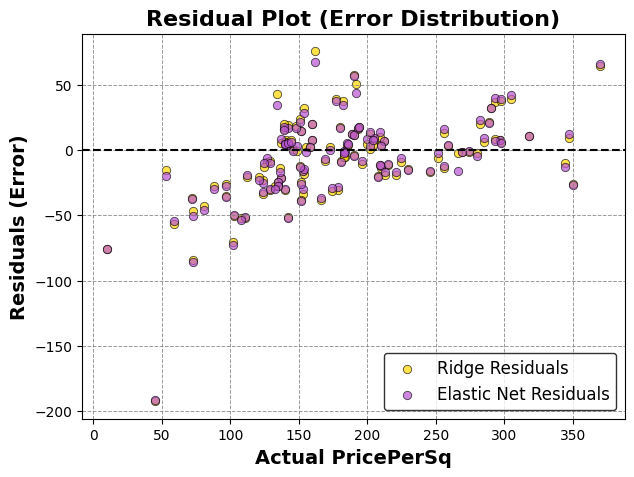

In [52]:
import matplotlib.pyplot as plt

# Define new colors
ridge_color = "#FFD700"  # Golden Yellow (bright and highly visible)
elastic_color = "#BA55D3"  # Warm Purple (Medium Orchid)

ridge_residuals = y_test - ridge_pred
elastic_residuals = y_test - elastic_pred

plt.figure(figsize=(7,5))

# Ridge Residuals (Golden Yellow)
plt.scatter(y_test, ridge_residuals, alpha=0.7, label="Ridge Residuals", 
            color=ridge_color, edgecolors='k', linewidth=0.6)

# Elastic Net Residuals (Warm Purple)
plt.scatter(y_test, elastic_residuals, alpha=0.7, label="Elastic Net Residuals", 
            color=elastic_color, edgecolors='k', linewidth=0.6)

# Zero-error reference line
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Labels and formatting
plt.xlabel("Actual PricePerSq", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Residuals (Error)", fontsize=14, fontweight='bold', color='black')
plt.title("Residual Plot (Error Distribution)", fontsize=16, fontweight='bold', color='black')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='gray')

# Legend styling
plt.legend(fontsize=12, loc="best", edgecolor='black')

# Show plot
plt.show()

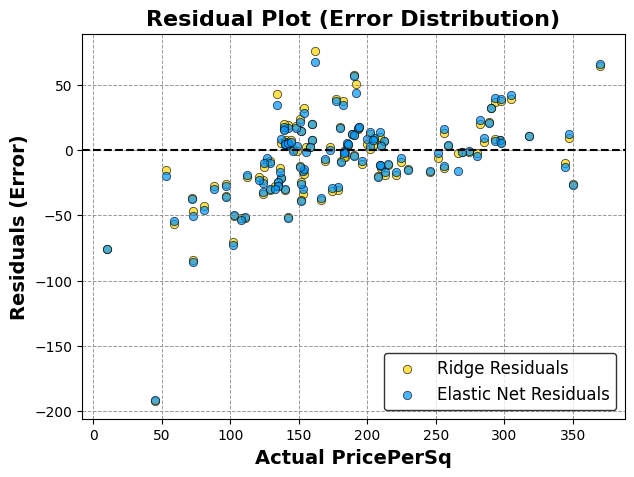

In [45]:
import matplotlib.pyplot as plt

# Define high-contrast colors
ridge_color = "#FFD700"  # Bright Yellow
elastic_color = "#0096FF"  # Electric Blue

ridge_residuals = y_test - ridge_pred
elastic_residuals = y_test - elastic_pred

plt.figure(figsize=(7,5))

# Ridge Residuals (Bright Yellow)
plt.scatter(y_test, ridge_residuals, alpha=0.7, label="Ridge Residuals", 
            color=ridge_color, edgecolors='k', linewidth=0.6)

# Elastic Net Residuals (Electric Blue)
plt.scatter(y_test, elastic_residuals, alpha=0.7, label="Elastic Net Residuals", 
            color=elastic_color, edgecolors='k', linewidth=0.6)

# Zero-error reference line
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Labels and formatting
plt.xlabel("Actual PricePerSq", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Residuals (Error)", fontsize=14, fontweight='bold', color='black')
plt.title("Residual Plot (Error Distribution)", fontsize=16, fontweight='bold', color='black')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='gray')

# Legend styling
plt.legend(fontsize=12, loc="best", edgecolor='black')

# Show plot
plt.show()

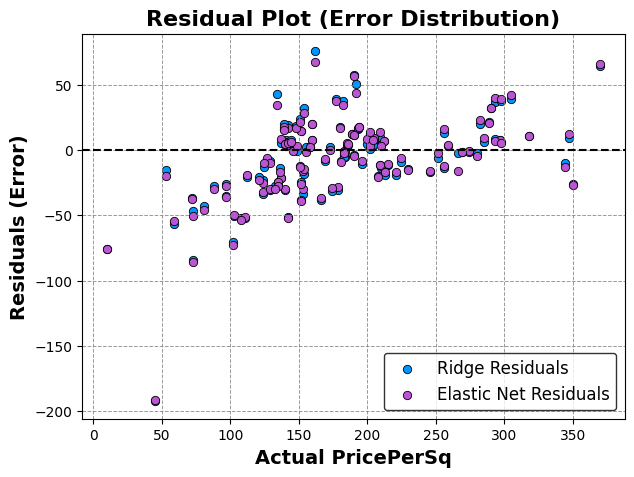

In [56]:
import matplotlib.pyplot as plt

# Define new colors
ridge_color = "#0096FF"  # Electric Blue (Bright & high contrast)
elastic_color = "#BA55D3"  # Warm Purple (Medium Orchid)

ridge_residuals = y_test - ridge_pred
elastic_residuals = y_test - elastic_pred

plt.figure(figsize=(7,5))

# Ridge Residuals (Electric Blue)
plt.scatter(y_test, ridge_residuals, alpha=1, label="Ridge Residuals", 
            color=ridge_color, edgecolors='k', linewidth=0.6)

# Elastic Net Residuals (Warm Purple)
plt.scatter(y_test, elastic_residuals, alpha=1, label="Elastic Net Residuals", 
            color=elastic_color, edgecolors='k', linewidth=0.6)

# Zero-error reference line
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Labels and formatting
plt.xlabel("Actual PricePerSq", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Residuals (Error)", fontsize=14, fontweight='bold', color='black')
plt.title("Residual Plot (Error Distribution)", fontsize=16, fontweight='bold', color='black')

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='gray')

# Legend styling
plt.legend(fontsize=12, loc="best", edgecolor='black')

# Show plot
plt.show()

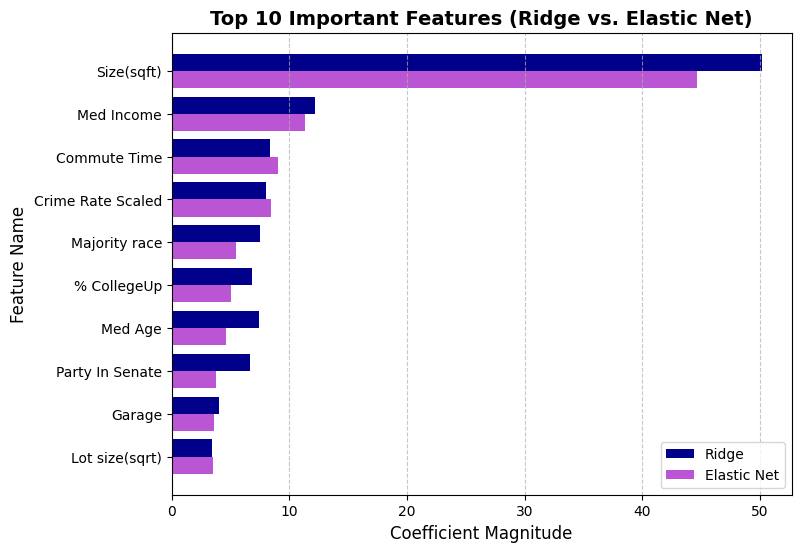

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients) for Elastic Net
elastic_importance = pd.Series(elastic_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Get feature importance (coefficients) for Ridge
ridge_importance = pd.Series(ridge_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Select top 10 features based on Elastic Net importance
top_features = elastic_importance[:10].index  # Most important to least important

# Retrieve corresponding Ridge importance for the same features
ridge_top = ridge_importance[top_features]
elastic_top = elastic_importance[top_features]

# Create a grouped bar chart (top to bottom layout)
plt.figure(figsize=(8,6))
x = np.arange(len(top_features))  # X-axis positions

plt.barh(x - 0.2, ridge_top, height=0.4, label="Ridge", color="#00008B")  # Dark Blue
plt.barh(x + 0.2, elastic_top, height=0.4, label="Elastic Net", color="#BA55D3")  # Warm Purple (Medium Orchid)

# Set labels and formatting
plt.yticks(x, top_features)
plt.xlabel("Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.title("Top 10 Important Features (Ridge vs. Elastic Net)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Flip the Y-axis so the most important features appear at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

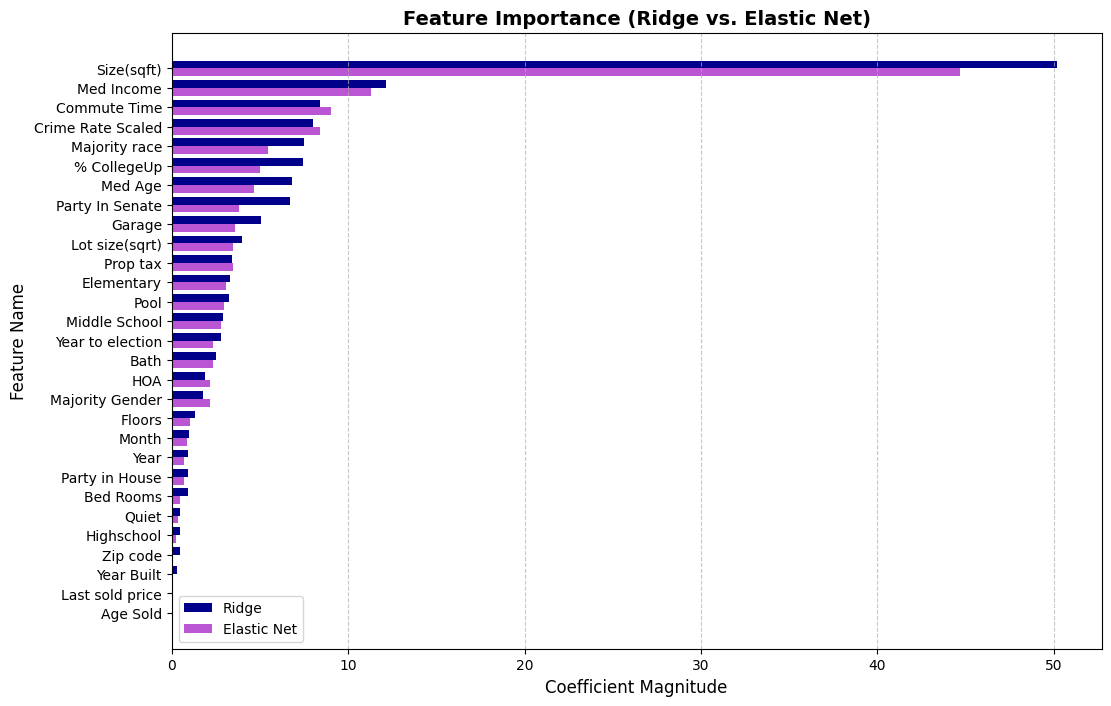

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients) for Elastic Net
elastic_importance = pd.Series(elastic_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Get feature importance (coefficients) for Ridge
ridge_importance = pd.Series(ridge_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Create a grouped bar chart (top to bottom layout)
plt.figure(figsize=(12,8))
x = np.arange(len(elastic_importance))  # X-axis positions for all features

plt.barh(x - 0.2, ridge_importance, height=0.4, label="Ridge", color="#00008B")  # Dark Blue
plt.barh(x + 0.2, elastic_importance, height=0.4, label="Elastic Net", color="#BA55D3")  # Warm Purple (Medium Orchid)

# Set labels and formatting
plt.yticks(x, elastic_importance.index)  # Display all feature names on the y-axis
plt.xlabel("Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.title("Feature Importance (Ridge vs. Elastic Net)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Flip the Y-axis so the most important features appear at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

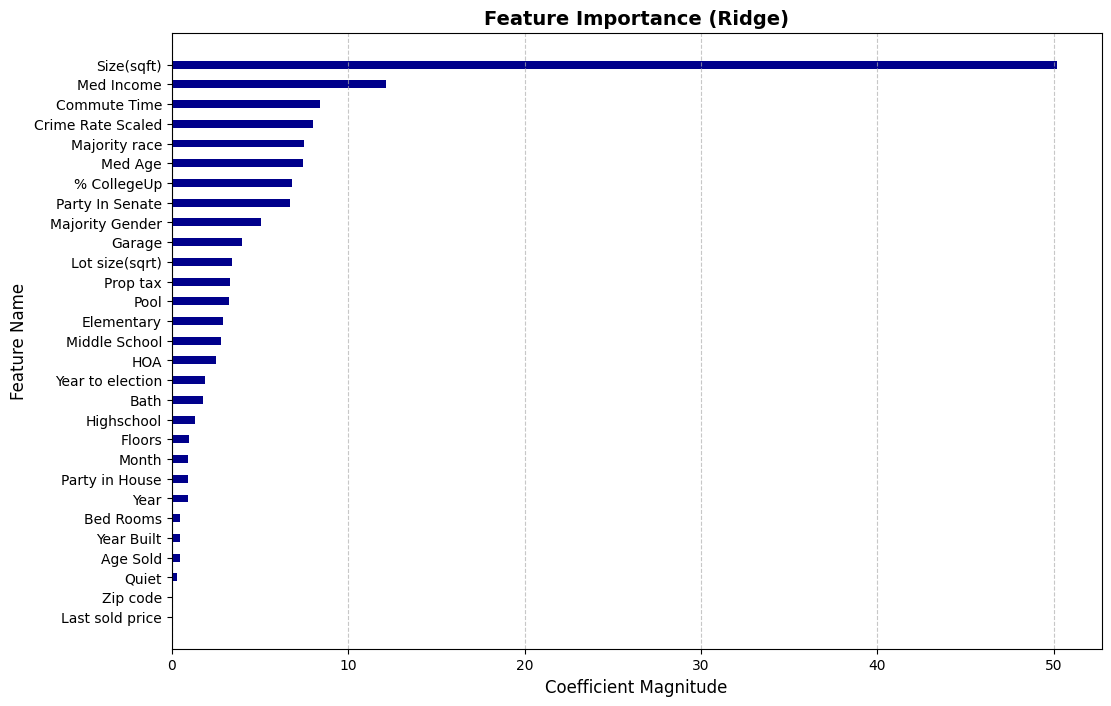

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients) for Ridge
ridge_importance = pd.Series(ridge_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Create a bar chart for Ridge feature importance
plt.figure(figsize=(12,8))
x = np.arange(len(ridge_importance))  # X-axis positions for all features

plt.barh(x, ridge_importance, height=0.4, label="Ridge", color="#00008B")  # Dark Blue

# Set labels and formatting
plt.yticks(x, ridge_importance.index)  # Display all feature names on the y-axis
plt.xlabel("Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.title("Feature Importance (Ridge)", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Flip the Y-axis so the most important features appear at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()

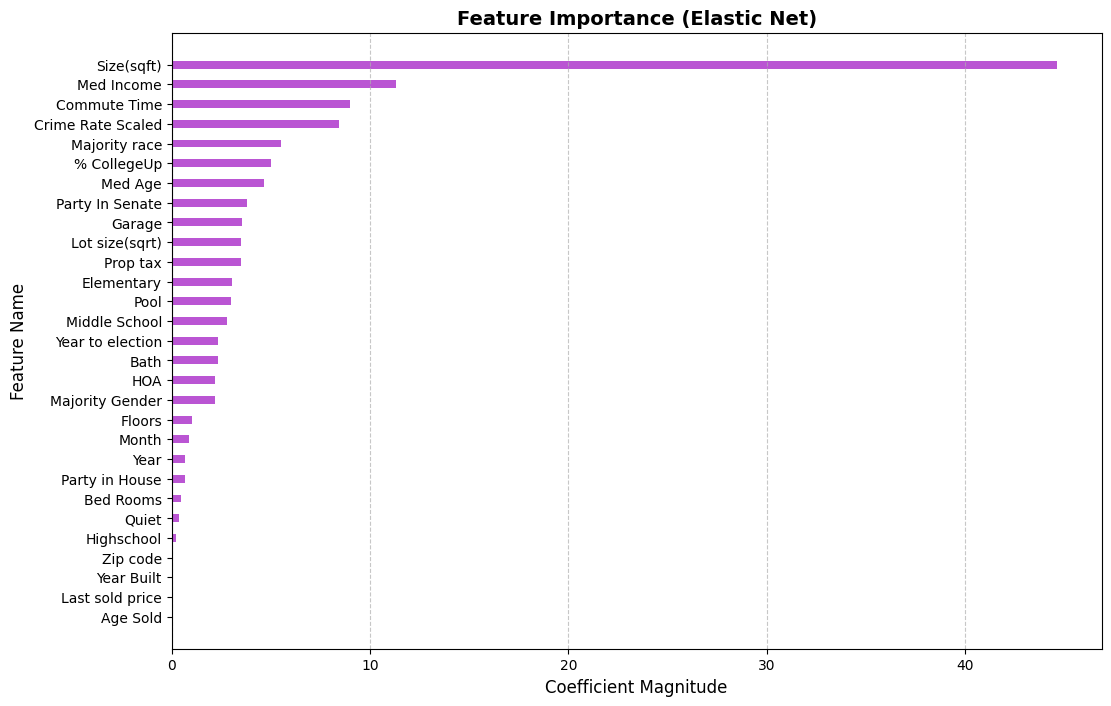

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients) for Elastic Net
elastic_importance = pd.Series(elastic_final.coef_, index=X_train.columns).abs().sort_values(ascending=False)

# Create a bar chart for Elastic Net feature importance
plt.figure(figsize=(12,8))
x = np.arange(len(elastic_importance))  # X-axis positions for all features

plt.barh(x, elastic_importance, height=0.4, label="Elastic Net", color="#BA55D3")  # Warm Purple (Medium Orchid)

# Set labels and formatting
plt.yticks(x, elastic_importance.index)  # Display all feature names on the y-axis
plt.xlabel("Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.title("Feature Importance (Elastic Net)", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Flip the Y-axis so the most important features appear at the top
plt.gca().invert_yaxis()

# Show plot
plt.show()